## Geneva Dataset Task Suitability and Exploration



In [1]:
from huggingface_hub import snapshot_download

# Download the entire dataset
dataset_path = snapshot_download(
    repo_id="raphaelattias/overfitteam-geneva-satellite-images",
    repo_type="dataset"
)

print(f"Dataset downloaded to: {dataset_path}")


Fetching 2111 files:   0%|          | 0/2111 [00:00<?, ?it/s]

Dataset downloaded to: /Users/giocopp/.cache/huggingface/hub/datasets--raphaelattias--overfitteam-geneva-satellite-images/snapshots/3f90d759384e4cd38276290521b6f6b03ddfcf87


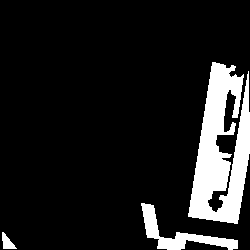

In [2]:
from PIL import Image
import os

# After downloading, load image and label
train_img_path = os.path.join(dataset_path, "train/images/all/DOP25_LV03_1301_11_2015_1_15_497500.0_119062.5.png")
train_label_path = os.path.join(dataset_path, "train/labels/all/DOP25_LV03_1301_11_2015_1_15_497500.0_119062.5_label.png")

image = Image.open(train_img_path)
label = Image.open(train_label_path)


In [29]:
from torch.utils.data import Dataset
import torchvision.transforms as transforms
from huggingface_hub import snapshot_download
from PIL import Image
import os

class GenevaRooftopDataset(Dataset):
    def __init__(self, split='train', category='all', transform=None, dataset_path=None):
        """
        Args:
            split (str): One of 'train', 'val', or 'test'
            category (str): One of 'all', 'industrial', or 'residencial'
            transform: Optional transform to be applied on images and labels
            dataset_path (str): Path to downloaded dataset. If None, will download automatically.
        """
        if dataset_path is None:
            dataset_path = snapshot_download(
                repo_id="raphaelattias/overfitteam-geneva-satellite-images",
                repo_type="dataset"
            )

        self.split = split
        self.category = category
        self.image_dir = os.path.join(dataset_path, f"{split}/images/{category}")
        self.label_dir = os.path.join(dataset_path, f"{split}/labels/{category}")
        self.transform = transform

        self.images = sorted([f for f in os.listdir(self.image_dir) if f.endswith('.png')])

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_name = self.images[idx]
        label_name = img_name.replace('.png', '_label.png')

        image = Image.open(os.path.join(self.image_dir, img_name)).convert('RGB')
        label = Image.open(os.path.join(self.label_dir, label_name))

        if self.transform:
            image = self.transform(image)
            label = self.transform(label)

        return image, label

# Create dataset - will automatically download if needed
train_dataset = GenevaRooftopDataset(split='train', category='all')
val_dataset = GenevaRooftopDataset(split='val', category='all')
test_dataset = GenevaRooftopDataset(split='test', category='all')

print(f"Train samples: {len(train_dataset)}")
print(f"Val samples: {len(val_dataset)}")
print(f"Test samples: {len(test_dataset)}")


Fetching 2111 files:   0%|          | 0/2111 [00:00<?, ?it/s]

Fetching 2111 files:   0%|          | 0/2111 [00:00<?, ?it/s]

Fetching 2111 files:   0%|          | 0/2111 [00:00<?, ?it/s]

Train samples: 420
Val samples: 52
Test samples: 53
